In [1]:
import pywt
from skimage import io 
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.segmentation import mark_boundaries

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [2]:
img = "https://raw.githubusercontent.com/rkwitt/teaching/master/WS1718/IP/PS/Ex7/dog.png"
img = io.imread(img)

In [3]:
imgLAB = skimage.color.rgb2lab(img)
W = imgLAB.shape[0]
H = imgLAB.shape[1]
X = imgLAB.reshape((W*H,3))

# Adding spatial coordinates
x_, y_ = np.meshgrid(np.linspace(0, H-1, H), np.linspace(0, W-1, W))
Y = np.concatenate((X, x_.flatten()[:,np.newaxis], y_.flatten()[:,np.newaxis]), 1)

In [4]:
def getCentersAndLabels (k, X ) : 
    sample = shuffle(X, random_state=0)[:5000]
    km = KMeans(n_clusters=k)
    km.fit(sample)
    
    centers = km.cluster_centers_
    labels = km.predict(X)
    labels = labels.reshape(W,H)
    
    return centers, labels

In [7]:
def create_image(centers, labels, w, h):
#     image = np.zeros((w, h, 3))

    image = centers[labels]    
    image = skimage.color.lab2rgb(image)

    return image

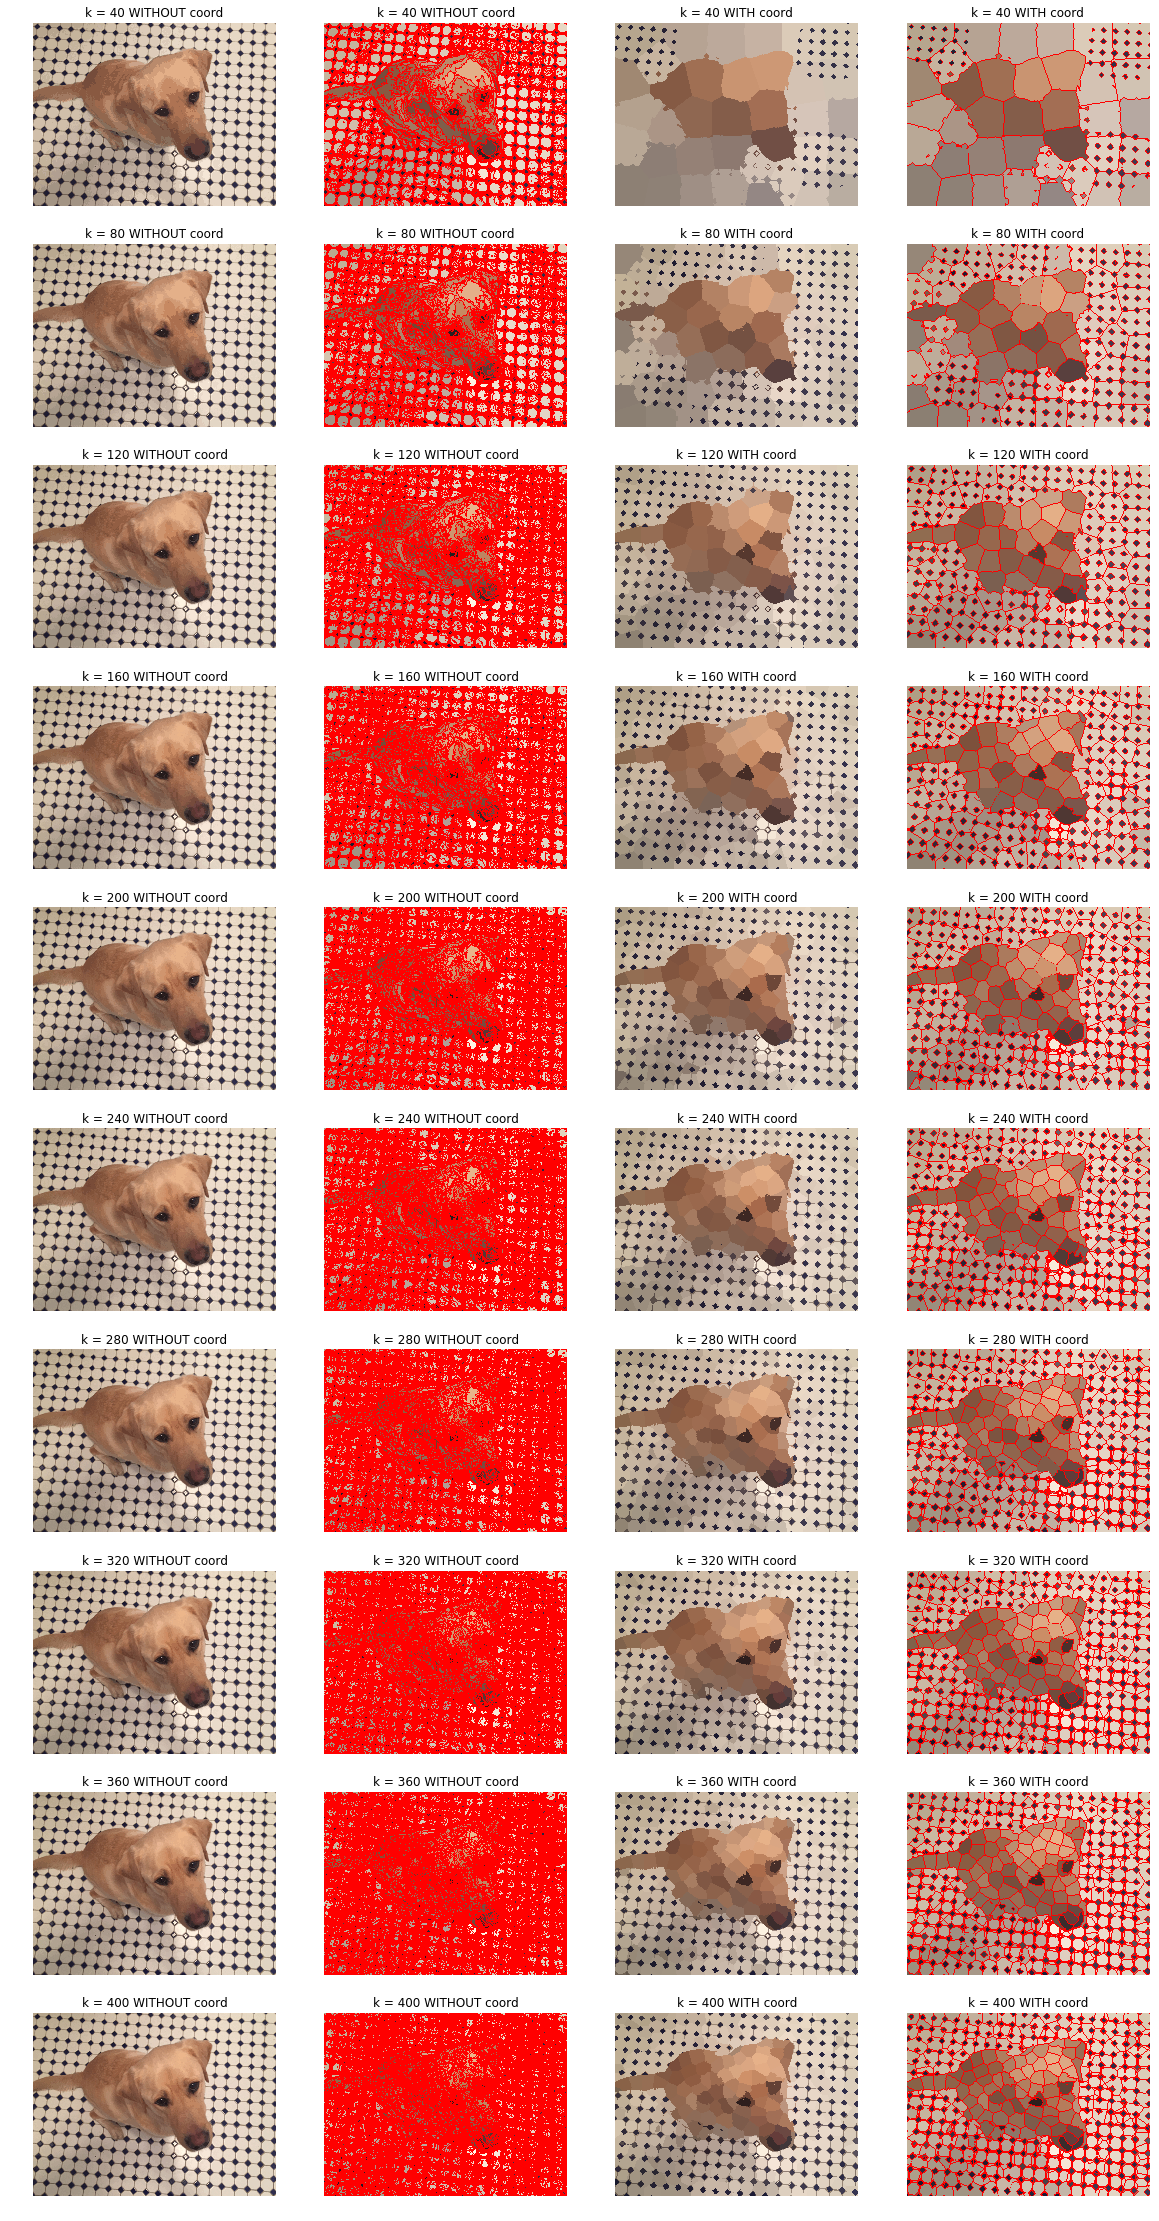

In [9]:
fig, ax = plt.subplots(10, 4, figsize=(20, 40), sharex=True, sharey=True)

for i in range(0, 10) :
    k = i*40 + 40
    centersX, labelsX = getCentersAndLabels ( k, X )
    centersY, labelsY = getCentersAndLabels ( k, Y )
    
    imgX = create_image( centersX, labelsX, W, H )
    imgY = create_image( centersY[:,:3] , labelsY, W, H )
        
    ax[i, 0].imshow(imgX)
    ax[i, 0].set_title('k = ' + str(k) + ' WITHOUT coord')
    ax[i, 0].set_axis_off()    
    
    ax[i, 1].imshow(
    mark_boundaries(
        imgX,
        labelsX.reshape((imgX.shape[0],imgX.shape[1])),
        color=(1, 0, 0)))
    ax[i, 1].set_title('k = ' + str(k) + ' WITHOUT coord')
    ax[i, 1].set_axis_off()
    
    ax[i, 2].imshow(imgY)
    ax[i, 2].set_title('k = ' + str(k) + ' WITH coord')
    ax[i, 2].set_axis_off()    
    
    ax[i, 3].imshow(mark_boundaries(
        imgY,
        labelsY.reshape((imgY.shape[0],imgY.shape[1])),
        color=(1, 0, 0)))
    ax[i, 3].set_title('k = ' + str(k) + ' WITH coord')
    ax[i, 3].set_axis_off()
plt.show()
    